# Computational Models

$$y = f_\theta(x)$$

Where

$ x = [x_0, x_1, x_2, ...]$ are the input variables (features, independent variables)

$\theta = [\theta_0, \theta_1, \theta_2, ...]$ are the parameters

$y$ is the dependent variable or prediction.

Given the format of the mapping function $f$, Machine Learning is to find out the parameter set $\theta$

# Linear Regression

\begin{equation}
y = \sum_{i=0}^n \theta_i x_i = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2\ +\  ... +\ \theta_n x_n
\end{equation}
For convention, we define $x_0 = 1$ as the intercept term.
Therefore $x_1, x_2, ... x_n$ are the features and $n$ is the number of features.

A simpler notation
$$
y = \theta^T x
$$
where

$\theta^T = 
\begin{bmatrix}
\theta_0 & \theta_1 & \theta_2 & ... & \theta_n
\end{bmatrix}
$,
and
$
x = 
\begin{bmatrix}
x_0\\ x_1\\ x_2\\ ... \\x_n
\end{bmatrix}
$

# Car Price Prediction Model

In [1]:
## Loading dataset with pandas
import pandas as pd
file = "./data/car_data.csv"
df = pd.read_csv(file)
df.shape

(301, 9)

In [2]:
df.head(n=20)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


# Feature Selection and Feature Extraction

In [3]:
# Feature Selection
df_X = df[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission']]
df_X.head(n=10)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,2014,5.59,27000,Petrol,Dealer,Manual
1,2013,9.54,43000,Diesel,Dealer,Manual
2,2017,9.85,6900,Petrol,Dealer,Manual
3,2011,4.15,5200,Petrol,Dealer,Manual
4,2014,6.87,42450,Diesel,Dealer,Manual
5,2018,9.83,2071,Diesel,Dealer,Manual
6,2015,8.12,18796,Petrol,Dealer,Manual
7,2015,8.61,33429,Diesel,Dealer,Manual
8,2016,8.89,20273,Diesel,Dealer,Manual
9,2015,8.92,42367,Diesel,Dealer,Manual


In [4]:
y = df['Selling_Price'].values
# y = df['selling_price'].values
# y = y.reshape(-1, 1)
y[:20]

array([3.35, 4.75, 7.25, 2.85, 4.6 , 9.25, 6.75, 6.5 , 8.75, 7.45, 2.85,
       6.85, 7.5 , 6.1 , 2.25, 7.75, 7.25, 7.75, 3.25, 2.65])

# Data Preprocessing

## Data Cleaning

## Encoding Categorical Data

In [5]:
df_X['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['fuel', 'transmission'])], remainder='passthrough')
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Fuel_Type', 'Seller_Type', 'Transmission'])], remainder='passthrough')
X = ct.fit_transform(df_X)
X.shape

(301, 10)

In [7]:
df_X.loc[10:19, 'Fuel_Type']

10    Petrol
11    Diesel
12    Petrol
13    Petrol
14    Petrol
15    Diesel
16    Diesel
17    Diesel
18       CNG
19    Petrol
Name: Fuel_Type, dtype: object

In [8]:
# The fuel categories are sorted as CNG, Diesel and Petrol
X[10:20, :3]

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [9]:
df_X.loc[10:19, 'Transmission']

10       Manual
11       Manual
12    Automatic
13       Manual
14       Manual
15       Manual
16       Manual
17       Manual
18       Manual
19       Manual
Name: Transmission, dtype: object

In [10]:
# You can also ignore one dummy variable or use LableEncoder
X[10:19, 5:7]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

## Split the dataset into the training set and test set

Remember to shuffle the data set before the splitting

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 10), (61, 10), (240,), (61,))

## Data Normalization
Note:
 * No need to scale the dummy variables generated by one-hot encoding
 * Data Normalization should to be done after the train-test splitting
 * The scaler applied to training set will also be used to scale the test set.

In [12]:
X_train[:10, 7:]

array([[2.0080e+03, 7.5000e-01, 2.6000e+04],
       [2.0170e+03, 9.5000e-01, 3.5000e+03],
       [2.0080e+03, 7.8700e-01, 5.0000e+04],
       [2.0150e+03, 6.8000e+00, 3.6000e+04],
       [2.0160e+03, 1.5000e+00, 8.7000e+03],
       [2.0140e+03, 3.5960e+01, 4.1000e+04],
       [2.0150e+03, 3.0610e+01, 4.0000e+04],
       [2.0150e+03, 8.1200e+00, 1.8796e+04],
       [2.0110e+03, 7.8700e-01, 7.5000e+04],
       [2.0120e+03, 5.9800e+00, 5.1439e+04]])

In [13]:
# Note: the scaler applied to training set will also be used to scale the test set.
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler()
X_scaler.fit(X_train[:, 7:])
X_train[:, 7:] = X_scaler.transform(X_train[:, 7:])
X_test[:, 7:] = X_scaler.transform(X_test[:, 7:])

In [14]:
X_train[:10, 7:]

array([[-1.96986094, -0.75359579, -0.27555466],
       [ 1.15644297, -0.73130669, -0.81428242],
       [-1.96986094, -0.7494723 ,  0.29908829],
       [ 0.46170877, -0.07935058, -0.0361201 ],
       [ 0.80907587, -0.67001167, -0.68977645],
       [ 0.11434167,  3.17039986,  0.08359718],
       [ 0.46170877,  2.5741665 ,  0.05965372],
       [ 0.46170877,  0.06775746, -0.44804332],
       [-0.92775963, -0.7494723 ,  0.89767469],
       [-0.58039253, -0.17073588,  0.33354292]])

# Train the model

Linear regression is used here

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Performance Evaluation

In [16]:
y_pred = model.predict(X_test)
y_pred[:20]

array([ 2.88182954,  8.17528022,  6.43409771, -0.63352606,  9.02787139,
        7.44545662,  1.28372036,  0.77213879,  1.32954546,  7.49944457,
        9.18829964,  0.50190927,  8.34630916,  3.36423516,  6.89514616,
        3.0225337 ,  0.38299267, 10.70982303,  1.73203983,  2.32226104])

In [17]:
y_test[:20]

array([ 0.35, 10.11,  4.95,  0.15,  6.95,  7.45,  1.1 ,  0.5 ,  0.45,
        6.  ,  9.25,  1.1 ,  7.5 ,  0.4 ,  6.15,  2.65,  0.95, 17.  ,
        0.48,  1.7 ])

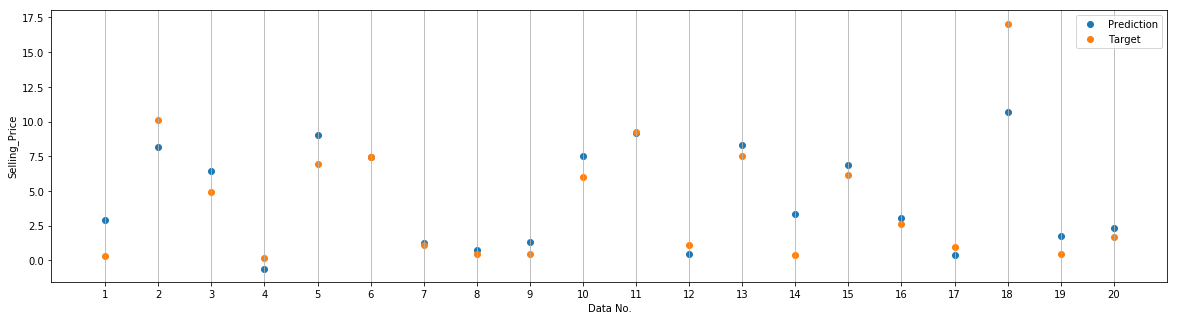

In [26]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(20, 5))
ax.scatter(range(1, 21), y_pred[:20], label='Prediction')
ax.scatter(range(1, 21), y_test[:20], label='Target')
ax.set_xlabel('Data No.')
ax.set_ylabel('Selling_Price')
ax.set_xticks(range(1, 21))
ax.grid(axis='x')
ax.legend()
plt.show()

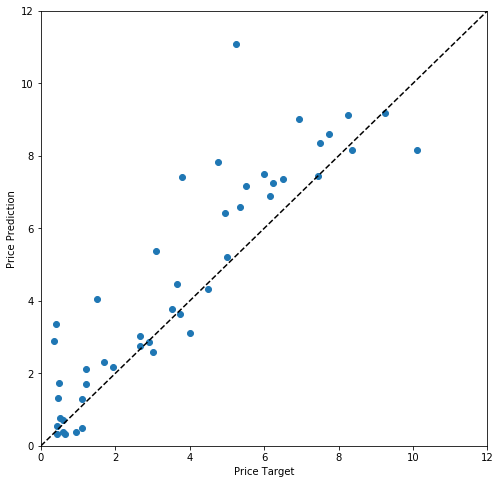

In [19]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_test[:50], y_pred[:50])
ax.set_xlabel("Price Target")
ax.set_ylabel("Price Prediction")
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.plot([0, 100], [0, 100], 'k--')

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8541290953766715

# Analysis and Interpretation

In [21]:
model.coef_

array([-1.08038085,  1.45449316, -0.37411231,  0.62664488, -0.62664488,
        0.80023694, -0.80023694,  1.06388228,  3.82968658, -0.25474113])

In [22]:
columns = ['CNG', 'Diesel', 'Petrol', 'Detaler', 'Individual', 'Automatic', 'Manual', 'Year', 'Present_Price', 'Kms_Driven']
pd.DataFrame(model.coef_, index=columns)

,0
CNG,-1.080381
Diesel,1.454493
Petrol,-0.374112
Detaler,0.626645
Individual,-0.626645
Automatic,0.800237
Manual,-0.800237
Year,1.063882
Present_Price,3.829687
Kms_Driven,-0.254741


In [23]:
# from sklearn.svm import SVR
# model = SVR()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# y_pred[:20]

# Exercise

## Recall matrix multiplication 
$$A^{2\times 3} =
\begin{bmatrix}
a_{11} & a_{12} & a_{13}\\
a_{21} & a_{22} & a_{33}\\
\end{bmatrix}
,
B^{3\times 2} =
\begin{bmatrix}
b_{11} & b_{12}\\
b_{21} & b_{22}\\
b_{31} & b_{32}
\end{bmatrix}
$$,
$$C^{2\times 2} = A\cdot B =
\begin{bmatrix}
c_{11} & c_{12}\\
c_{21} & c_{22}\\
\end{bmatrix}
$$
where
$$
c_{11} = a_{11}b_{11} + a_{12}b_{21} + a_{13}b_{31},
c_{12} = a_{11}b_{12} + a_{12}b_{22} + a_{13}b_{32},\\
c_{21} = a_{21}b_{11} + a_{22}b_{21} + a_{23}b_{31},
c_{22} = a_{21}b_{12} + a_{22}b_{22} + a_{23}b_{32}\\
$$

Exercise:
Given $A =
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
\end{bmatrix}
$,
$B =
\begin{bmatrix}
1 & 4\\
2 & 5\\
3 & 6\\
\end{bmatrix}
$,
Calculate $C = A\cdot B$

In [24]:
# Example of matrix multiplication with numpy
import numpy as np
a = np.array([[1, 2, 3],
              [4, 5, 6]])
b = np.array([[1, 4],
              [2, 5],
              [3, 6]])
c = a.dot(b)
print("a.shape:", a.shape)
print("b.shape:", b.shape)
print("c.shape:", c.shape)
print(c)

a.shape: (2, 3)
b.shape: (3, 2)
c.shape: (2, 2)
[[14 32]
 [32 77]]


## Boston Housing Data

In [25]:
# Loading boston housing price data set. Each record in the database describes a Boston suburb or town. 
# There are 506 Records, each record in the database describes a Boston suburb or town. 
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

from sklearn.datasets import load_boston
data = load_boston()
print("Feature Names:" , data['feature_names'])
print(data['DESCR'])

X.shape:  (506, 13)
y.shape:  (506,)
Feature Names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
   